# this notebook must be run with a sagemath jupyter kernel

Table of values:
Format: [x, y], [f(x), f(y)]
[[[-4.  -4. ]
  [ 0.8  0.8]]

 [[-4.  -3. ]
  [ 0.8  0.6]]

 [[-4.  -2. ]
  [ 0.8  0.4]]

 [[-4.  -1. ]
  [ 0.8  0.2]]

 [[-4.   0. ]
  [ 0.8  0. ]]

 [[-4.   1. ]
  [ 0.8 -0.2]]

 [[-4.   2. ]
  [ 0.8 -0.4]]

 [[-4.   3. ]
  [ 0.8 -0.6]]

 [[-4.   4. ]
  [ 0.8 -0.8]]

 [[-3.  -4. ]
  [ 0.6  0.8]]

 [[-3.  -3. ]
  [ 0.6  0.6]]

 [[-3.  -2. ]
  [ 0.6  0.4]]

 [[-3.  -1. ]
  [ 0.6  0.2]]

 [[-3.   0. ]
  [ 0.6  0. ]]

 [[-3.   1. ]
  [ 0.6 -0.2]]

 [[-3.   2. ]
  [ 0.6 -0.4]]

 [[-3.   3. ]
  [ 0.6 -0.6]]

 [[-3.   4. ]
  [ 0.6 -0.8]]

 [[-2.  -4. ]
  [ 0.4  0.8]]

 [[-2.  -3. ]
  [ 0.4  0.6]]

 [[-2.  -2. ]
  [ 0.4  0.4]]

 [[-2.  -1. ]
  [ 0.4  0.2]]

 [[-2.   0. ]
  [ 0.4  0. ]]

 [[-2.   1. ]
  [ 0.4 -0.2]]

 [[-2.   2. ]
  [ 0.4 -0.4]]

 [[-2.   3. ]
  [ 0.4 -0.6]]

 [[-2.   4. ]
  [ 0.4 -0.8]]

 [[-1.  -4. ]
  [ 0.2  0.8]]

 [[-1.  -3. ]
  [ 0.2  0.6]]

 [[-1.  -2. ]
  [ 0.2  0.4]]

 [[-1.  -1. ]
  [ 0.2  0.2]]

 [[-1.   0. ]
  [ 0.2  0

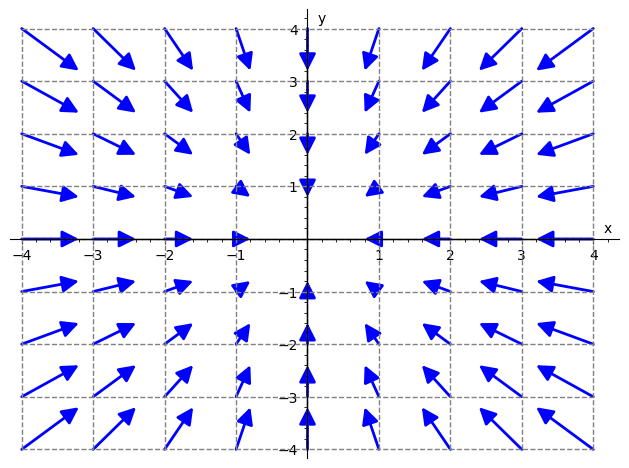

In [32]:
# SageMath code to graph the vector field with scaled vectors

import numpy as np

# Define the vector field F(x, y)
def F(x, y):
    return (-x, -y)  # Current function

# Points in a range
points = [(x, y) for x in range(-4, 5) for y in range(-4, 5)]

# Create the plot
vector_field_plot = Graphics()

# Initialize a list to store table values
table_data = []

# Scaling factor to adjust vector lengths
scaling_factor = 0.2  # Adjust this value as needed

# Add vectors to the plot and populate the table
for x, y in points:
    fx, fy = F(x, y)
    # Scale the vector components
    fx, fy = fx * scaling_factor, fy * scaling_factor
    vector_field_plot += arrow((x, y), (x + fx, y + fy), color='blue')
    table_data.append([[x, y], [fx, fy]])

# Convert the table data to a NumPy array
table_array = np.array(table_data)

# Print the table
print("Table of values:")
print("Format: [x, y], [f(x), f(y)]")
print(table_array)

# Add axes
vector_field_plot += line([(-4, 0), (4, 0)], color='black')  # x-axis
vector_field_plot += line([(0, -4), (0, 4)], color='black')  # y-axis
vector_field_plot += text("x", (4.2, 0.2), color='black')
vector_field_plot += text("y", (0.2, 4.2), color='black')

# Add grid lines
for i in range(-4, 5):
    vector_field_plot += line([(-4, i), (4, i)], color='gray', linestyle='dashed')  # horizontal grid lines
    vector_field_plot += line([(i, -4), (i, 4)], color='gray', linestyle='dashed')  # vertical grid lines

# Show the plot
vector_field_plot.show()

In [ ]:
# gradient vector field of a vector field

def gradient_vector_field(f, x, y, z):
    """
    Compute the gradient vector field of a scalar function f.
    :param f: Scalar function
    :param x: x-coordinate
    :param y: y-coordinate
    :param z: z-coordinate
    :return: Gradient vector field
    """
    # Compute the gradient vector field
    grad_f = [diff(f, var) for var in (x, y, z)]
    return grad_f

var('x y z')
f(x,y,z) = ln(5*x + y + 3*z)

print("Gradient vector field:")
print(gradient_vector_field(f, x, y, z))